1-1. 載入所需的套件 pandas, matplotlib, numpy, 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'HanWangHeiHeavy' # 設定字型檔讓 matplotlib 使用
import collections
import seaborn as sns
%matplotlib inline

1-2. 載入資料學測資料檔 exam_my.csv 存為變數 exam

In [2]:
exam = pd.read_csv('exam_mj.csv')
exam.head(2)

,QID,代號,來源,類別,年份,題型,題號,題目簡述,答案,章節,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
0,NaN,sdczk-mj091-1-01ax,指考數甲091,指考數甲,91,單選,1,正立方體內四頂點距離1,(B),msskx 空間向量,...,2.0,84.0,12.0,0.0,NaN,10.0,27.0,51.0,2.0,NaN
1,NaN,sdczk-mj091-1-02ax,指考數甲091,指考數甲,91,單選,2,五院院長的答對率,(C),msdtj 統計,...,0.0,0.0,99.0,0.0,NaN,2.0,6.0,81.0,3.0,NaN


1-3. 刪除 QID 欄，且將代號設為 index

In [3]:
del exam["QID"]

In [4]:
exam = exam.set_index(["代號"])
exam.head(2)

,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,P,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
代號,,,,,,,,,,,,,,,,,,,,,
sdczk-mj091-1-01ax,指考數甲091,指考數甲,91,單選,1,正立方體內四頂點距離1,(B),msskx 空間向量,NaN,55.0,...,2.0,84.0,12.0,0.0,NaN,10.0,27.0,51.0,2.0,NaN
sdczk-mj091-1-02ax,指考數甲091,指考數甲,91,單選,2,五院院長的答對率,(C),msdtj 統計,NaN,91.0,...,0.0,0.0,99.0,0.0,NaN,2.0,6.0,81.0,3.0,NaN


2.1 分別計算 單選, 多選, 填充的數量

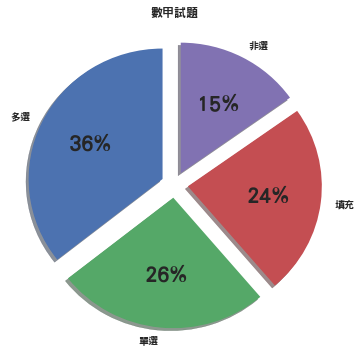

In [26]:
exam.head(2)
quesType = exam["題型"]
quesTypeCounts = quesType.value_counts()
quesTypeCounts.head()
plt.figure(figsize=(6,6))
font = {'size':20}
matplotlib.rc('font',**font)
plt.pie(quesTypeCounts,labels = quesTypeCounts.index, 
       autopct="%2.0f%%",shadow=True,startangle=90,
        explode=(0.1,0.1,0.1,0.1))
plt.title(u"數甲試題")

In [6]:
exambyYearType = exam.groupby(["來源","題型"]).count().iloc[:,0:1]
exambyYearType.columns.values[0]="題數"
exambyYearType.head(6)

題數
來源      題型    
指考數甲091 單選   2
        填充   3
        多選   6
        非選   2
指考數甲092 單選   2
        填充   4

In [7]:
exambyYearType.unstack().T

來源     指考數甲091  指考數甲092  指考數甲093  指考數甲094  指考數甲095  指考數甲096  指考數甲097  指考數甲098  \
   題型                                                                           
題數 單選      2.0      2.0      2.0      3.0      3.0      3.0      2.0      3.0   
   填充      3.0      4.0      2.0      2.0      5.0      3.0      2.0      3.0   
   多選      6.0      6.0      6.0      6.0      3.0      4.0      6.0      4.0   
   非選      2.0      NaN      2.0      2.0      2.0      3.0      2.0      2.0   

來源     指考數甲099  指考數甲100  指考數甲101  指考數甲102  指考數甲103  指考數甲104  指考數甲105  
   題型                                                                 
題數 單選      5.0      4.0      5.0      4.0      4.0      3.0      4.0  
   填充      4.0      4.0      2.0      2.0      2.0      3.0      4.0  
   多選      2.0      3.0      4.0      5.0      5.0      5.0      3.0  
   非選      2.0      2.0      2.0      2.0      2.0      2.0      2.0

In [8]:
ansRatebyType = exam.groupby("題型").mean().round(2)
ansRatebyType.iloc[:,1:12]

,章節（短）,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,T
題型,,,,,,,,,,,
單選,NaN,57.20,80.39,58.14,33.08,85.78,70.06,57.80,45.41,26.45,NaN
填充,NaN,40.04,69.16,38.20,12.78,77.33,53.62,38.04,23.22,7.67,NaN
多選,NaN,42.40,67.63,42.25,17.31,74.12,55.37,42.35,29.25,11.06,29.05
非選,NaN,28.00,46.00,26.00,12.00,53.00,34.00,26.00,20.00,8.00,9.00


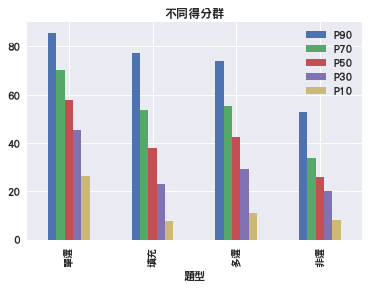

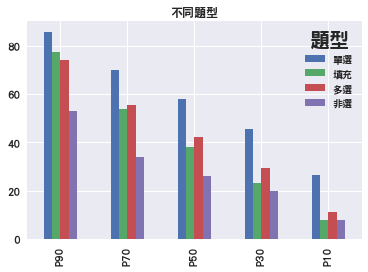

In [27]:
ansRatebyTypeGroup5 =  ansRatebyType.iloc[:,6:11]
ansRatebyTypeGroup5
ansRatebyTypeGroup5.plot.bar(title="不同得分群")
ansRatebyTypeGroup5.T.plot.bar(title="不同題型")

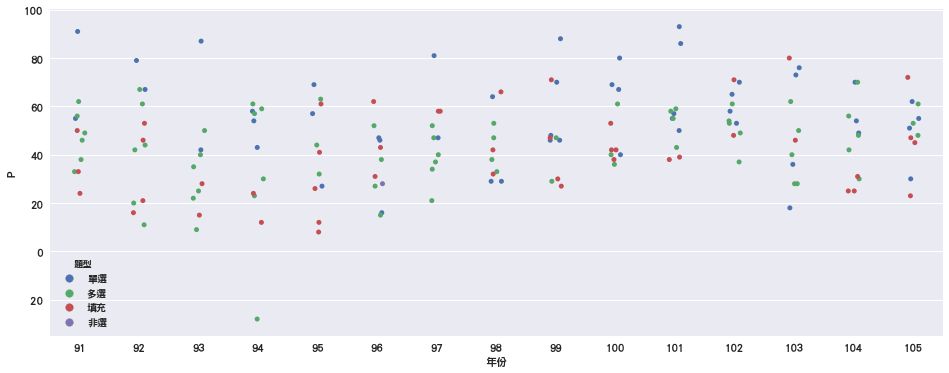

In [28]:
plt.figure(figsize=(16,6))
sns.stripplot(x="年份",y="P",data=exam,hue="題型",jitter=True)

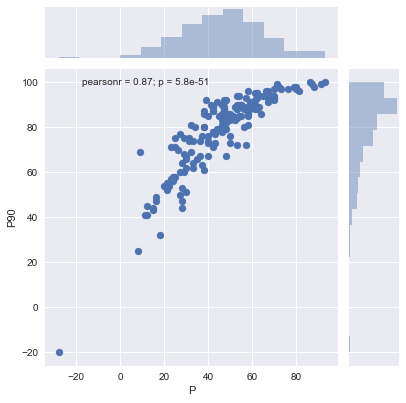

In [11]:
sns.jointplot(x="P",y="P90",data=exam)

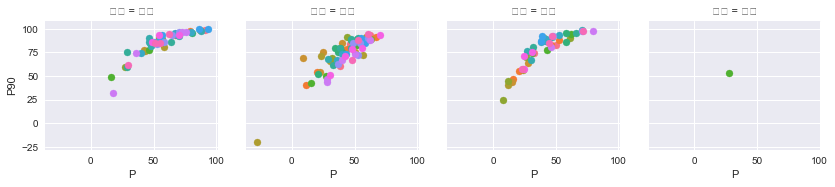

In [12]:
g = sns.FacetGrid(exam,col="題型",hue="年份")
g.map(plt.scatter,"P","P90")

將 單選, 多選, 填充 分成三個表 singCho, multCho, textBox

In [13]:
singCho = exam[exam["題型"].isin(['單選'])]
multCho = exam[exam["題型"] =='多選']
textBox = exam[exam.題型.isin(['填充'])]
exnonCho= exam[exam["題型"] !='非選']

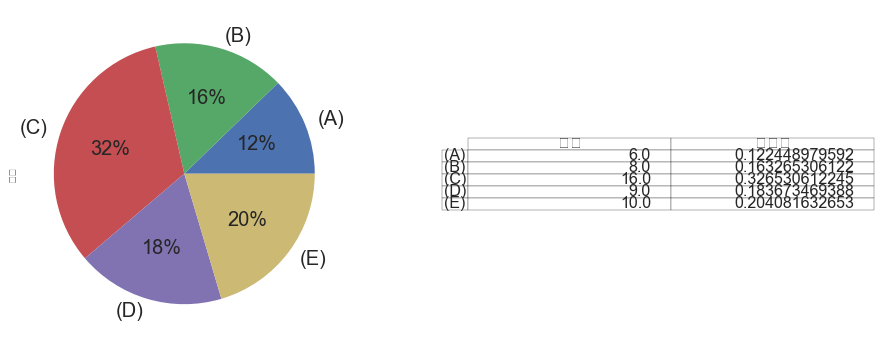

In [14]:
singChoAns = singCho[["答案","P"]].groupby(by = "答案").count()
singChoAns.columns.values[0]="題數"
singChoAns["百分比"]= singChoAns["題數"]/len(singCho)
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121,aspect="equal")
singChoAns.plot(kind='pie',y="題數",ax=ax1, autopct="%2d%%",fontsize = 20,legend=False)
ax2 = plt.subplot(122)
plt.axis("off")
from pandas.tools.plotting import table
tbl = table(ax2,singChoAns,loc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(16)
plt.show()

In [15]:
singCho.describe()

,年份,章節（短）,P,Ph,Pm,Pl,P90,P70,P50,P30,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
count,49.000000,0.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,40.000000,49.000000,49.000000,49.000000,49.000000,40.000000
mean,98.918367,NaN,57.204082,80.387755,58.142857,33.081633,85.775510,70.061224,57.795918,45.408163,...,13.326531,18.020408,28.795918,16.510204,24.600000,16.795918,21.020408,24.979592,15.448980,16.000000
std,4.086751,NaN,18.753866,16.416222,23.032586,19.707060,13.823689,21.319404,23.437843,23.452895,...,25.570481,32.071853,36.203694,28.744653,36.889857,15.242457,15.324939,15.159554,8.935093,14.983752
min,91.000000,NaN,16.000000,27.000000,8.000000,4.000000,32.000000,14.000000,7.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.000000,2.000000,1.000000
25%,96.000000,NaN,46.000000,76.000000,44.000000,20.000000,82.000000,62.000000,43.000000,28.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,7.000000,11.000000,13.000000,9.000000,6.000000
50%,99.000000,NaN,55.000000,83.000000,57.000000,28.000000,90.000000,71.000000,57.000000,39.000000,...,3.000000,4.000000,9.000000,2.000000,2.000000,12.000000,17.000000,22.000000,14.000000,10.500000
75%,102.000000,NaN,70.000000,92.000000,77.000000,44.000000,95.000000,86.000000,77.000000,62.000000,...,10.000000,9.000000,69.000000,6.000000,43.500000,22.000000,23.000000,31.000000,22.000000,20.500000
max,105.000000,NaN,93.000000,100.000000,98.000000,81.000000,100.000000,99.000000,98.000000,95.000000,...,100.000000,100.000000,99.000000,91.000000,96.000000,81.000000,75.000000,81.000000,40.000000,67.000000


In [16]:
multChoAns = multCho[["答案","P"]].groupby(by = "答案").count()
multChoAns.columns.values[0]="題數"
multChoAns.sort_values("題數",ascending=False)

,題數
答案,
(B)(D),8
(A)(D),7
(A)(B),6
(C)(D),6
(A)(C),6
(B)(C)(D),4
(A)(B)(C),4
(C)(D)(E),3
(A)(B)(D),3


In [17]:
multChoAns.reset_index(inplace=True)
multChoAns["答案個數"]=multChoAns["答案"].apply(lambda x: round(len(x)/3),0)
multChoAnsNum = multChoAns.groupby("答案個數").sum()
multChoAnsNum["百分比"]=multChoAnsNum["題數"]/len(multCho)
multChoAnsNum

,題數,百分比
答案個數,,
1,3,0.044118
2,38,0.558824
3,25,0.367647
4,2,0.029412


計算三種題型在不同群體的答對率

In [18]:
exambyChapter = exam.groupby("章節")
exambyChapter = exambyChapter.agg({"來源":"count","P":"mean","Ph":"mean","Pm":"mean","Pl":"mean","P90":"mean"})
exambyChapter.sort_values(by="來源",ascending=False)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msssj 三角函數,27,42.695652,70.217391,40.391304,17.478261,77.826087
msskx 空間向量,23,47.000000,75.476190,47.523810,18.000000,82.095238
msawj 微積分,22,45.307692,76.307692,44.384615,15.230769,83.846154
msdjl 機率,21,49.526316,74.052632,49.736842,24.789474,80.368421
msajz 矩陣與方程組,16,48.500000,75.071429,50.642857,19.785714,80.428571
msajt 指數與對數,15,58.428571,82.714286,61.142857,31.428571,87.785714
msseq 二次曲線,12,27.200000,48.200000,25.000000,8.400000,56.000000
msadx 多項式,10,36.250000,61.625000,34.625000,12.500000,69.250000
msspx 平面向量,8,46.285714,71.000000,45.142857,22.714286,78.000000


In [19]:
exambyChapter.sort_values(by="P90",ascending=True)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msswj 微積分,1,20.000000,43.000000,16.000000,1.000000,54.000000
msseq 二次曲線,12,27.200000,48.200000,25.000000,8.400000,56.000000
msnsl 數列與遞迴,3,35.000000,56.000000,30.500000,18.500000,65.500000
msdsp 隨機變數,2,36.500000,59.000000,33.500000,17.000000,66.000000
msadx 多項式,10,36.250000,61.625000,34.625000,12.500000,69.250000
msalm 極限,8,41.500000,65.125000,40.000000,19.375000,71.875000
msssj 三角函數,27,42.695652,70.217391,40.391304,17.478261,77.826087
msspx 平面向量,8,46.285714,71.000000,45.142857,22.714286,78.000000
mssjy 直線與圓,6,43.400000,71.200000,41.200000,17.800000,78.800000


/Users/acchu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


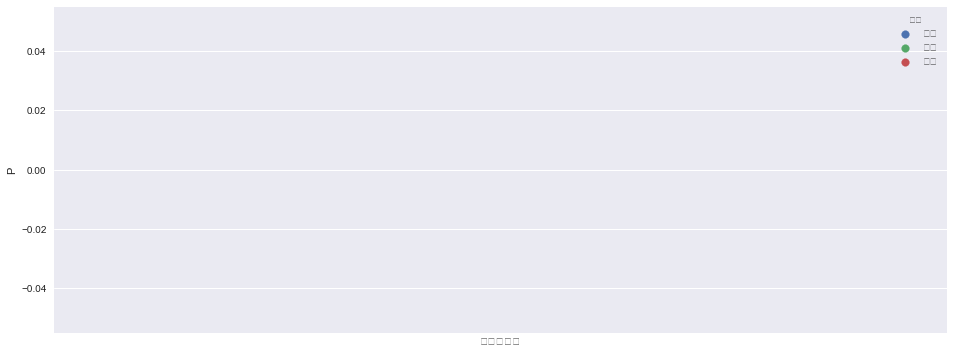

In [20]:
plt.figure(figsize=(16,6))
font = {'size':24}
matplotlib.rc('font',**font)
sns.stripplot(x="章節（短）",y="P",data=exnonCho,hue="題型",jitter=True)

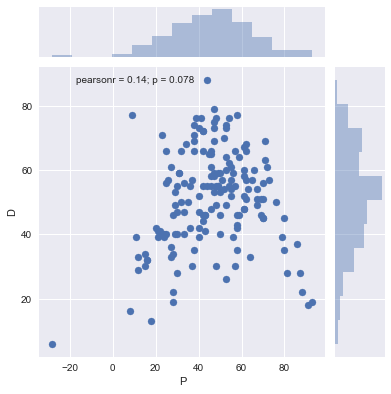

In [21]:
sns.jointplot(x="P",y="D",data=exam)

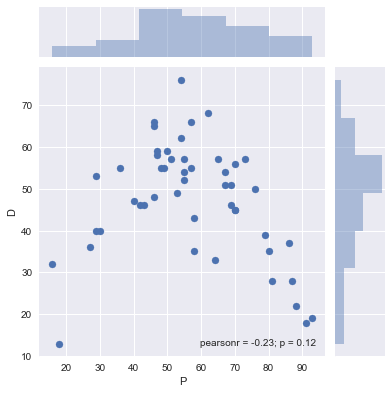

In [22]:
sns.jointplot(x="P",y="D",data=singCho)

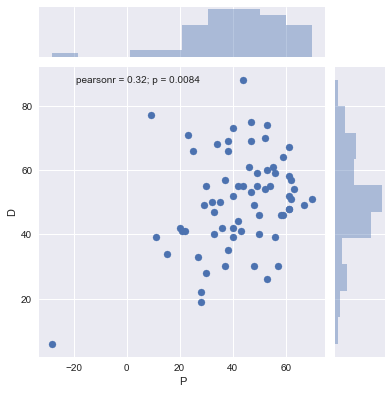

In [23]:
sns.jointplot(x="P",y="D",data=multCho)

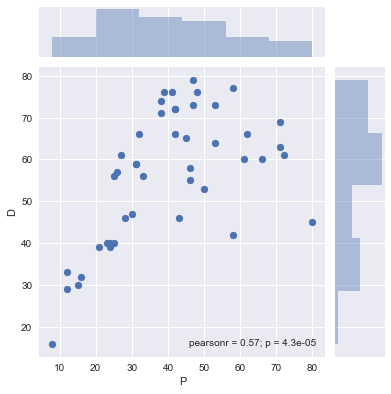

In [24]:
sns.jointplot(x="P",y="D",data=textBox)